In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# 2. Load csv dataset
df_costs = pd.read_csv("C:\\Users\\Emilio\\Desktop\\PGP\\Python\\insurance.csv")


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
# 3a. Data shape and type
type(df_costs)

pandas.core.frame.DataFrame

In [4]:
df_costs.shape

(1338, 7)

In [5]:
# 3b. Column types and names
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_costs.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
# 3c. Missing values
df_costs.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# 3d. 5 Point Summary
np.mean(df_costs, axis = 0)
df_costs[["age", "bmi", "children", "charges"]].describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021111EF70B8>,
      dtype=object)

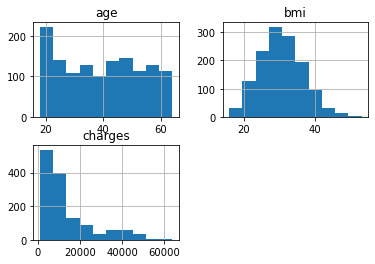

In [9]:
# 3e. Numerical Data Distribution
df_hist = df_costs.drop(columns=["sex", "children", "smoker", "region"])
df_hist.hist()

In [10]:
# 3f. Skewness
df_costs[["age", "bmi", "children", "charges"]].skew(axis=0)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [11]:
# 3g. Check for outliers, first array is row number, second array column number, where z value is larger than 3 in each respective column
z = np.abs(stats.zscore(df_costs[["age", "bmi", "charges"]]))
z3 = np.where(z > 3)
z3

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
       dtype=int64),
 array([2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1], dtype=int64))

In [12]:
# Alternatively we can create a matrix where TRUE if z > 3
zsum = z > 3
zsum = pd.DataFrame(zsum)
zsum.columns = ["age", "bmi", "charges"]
zsum
for i in ["age", "bmi", "charges"]:
 print(zsum[i].value_counts())

False    1338
Name: age, dtype: int64
False    1334
True        4
Name: bmi, dtype: int64
False    1331
True        7
Name: charges, dtype: int64


In [13]:
# 3h. Categorical data distribution
for i in ["sex", "children", "smoker", "region"]:
 print(df_costs[i].value_counts())

male      676
female    662
Name: sex, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211127480F0>,
      dtype=object)

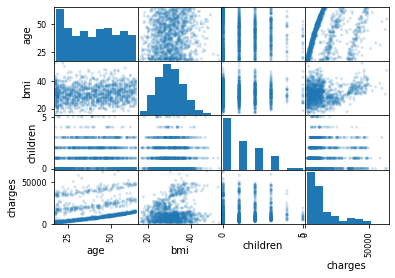

In [14]:
# 3i. Pair plot
pd.plotting.scatter_matrix(df_costs, alpha=0.2)

In [15]:
# 4.a Do charges of people who smoke differ significantly
# from the people who don't?


In [16]:
t_test = df_costs[["smoker", "charges"]]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [17]:
groupY_smk = np.array(t_test.where(t_test.smoker == "yes").dropna()['charges'])

In [18]:
groupN_smk = np.array(t_test.where(t_test.smoker == "no").dropna()['charges'])

In [19]:
stats.ttest_ind(groupY_smk, groupN_smk)

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

In [20]:
xs = t_test.loc[t_test['smoker'] == 'yes'].drop(columns=['smoker'])

In [21]:
ysmk =[]
nsmok = []
for i in t_test.index:
    if t_test.iloc[i][0] == 'yes':
        ysmk.append(t_test.iloc[i][1])
    else:
        nsmok.append(t_test.iloc[i][1]) 

In [22]:
seriessmk = pd.Series(ysmk)
seriesn = pd.Series(nsmok)

In [24]:
seriessmk.mean()

32050.23183153285

In [25]:
stats.ttest_ind(xs, seriesn)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [27]:
df_costs_features = df_costs.drop(columns='charges')
y = df_costs['charges']

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_costs_features, y, test_size=0.33, random_state=42)
X_train = pd.get_dummies(X_train) 
X_test = pd.get_dummies(X_test) 
X_train.shape

(896, 11)

In [29]:
clf = RandomForestRegressor(max_depth=3, n_estimators =5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2890.6391312267588
Mean Squared Error: 22386867.337128233
Root Mean Squared Error: 4731.476232332593
